### Import required packages

In [4]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Open the corresponding dataset based on the file encoding type and extension

In [5]:
#Open corresponding file
filename = "housing"
file_format = filename+'.csv'
encoding = ['utf8','latin1','iso-8859-1','cp1252','ascii']
encoding_list = len(encoding)
#Try all the possible encoding schemes to see which one applies to the dataset
for encoding_type in range(0,encoding_list-1):
    try:
        if file_format.endswith('.csv'):
            df = pd.read_csv(file_format, index_col=None , encoding = encoding[encoding_type]) 
        elif file_format.endswith('.json'):
            df = pd.read_json(file_format, lines=True)
        elif file_format.endswith('.html'):
            df = pd.read_html("url", index_col=None)
    except Exception:
        pass

### Display the top five items

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Convert the column names for uniformity

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### Choose the type of language

In [18]:
language = ['Arabic','Bulgarian','Catalan','Czech','Danish','Dutch','English','Finnish','French','German','Hungarian' \
            'Indonesian', 'Italian','Norwegian','Polish','Portuguese','Romanian','Russian','Spanish','Swedish','Turkish','Ukrainian']

### Method to generate word clouds

In [24]:
#Plots the value count of the specified column indexes 
def wordcloudOfColumns(df):
    try:
        choice = input("Do you want to compute word clouds? Type Yes or no\n")
        choice.lower()
        if choice == 'yes':
            #Set language
            stop_words = set(stopwords.words('english')) 
            print("The index values and the categorical columns are listed below:")
            #Lists the categorical columns in a dataset
            for index,column in enumerate(df.loc[:, df.dtypes == object]):
                print(index,column)
            ColumnIndexToBePlotted = [] 
            for i in range(0, 1):
                Number = int(input("Enter the index you want to plot a word cloud\n"))
                ColumnIndexToBePlotted.append(Number)
            columns_to_plot = [df.loc[:, df.dtypes == object].columns[i] for i in ColumnIndexToBePlotted] 
            word_dictionary = {}
            for index in range(0,len(columns_to_plot)):
                word_dictionary.update(df[columns_to_plot[index]])
            col = str(word_dictionary.values())    
            word_tokens = word_tokenize(col)
            filtered_sentence = [word for word in word_tokens if not word in stop_words] 
            filtered_sentence = [] 
            for word in word_tokens: 
                if word not in stop_words: 
                    filtered_sentence.append(word)
            for index in range(0,len(columns_to_plot)):
                wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stop_words, 
                min_font_size = 10, collocations=False).generate(''.join(str(filtered_sentence)))
                # plot the WordCloud image                        
                plt.figure(figsize = (8, 8), facecolor = None) 
                plt.imshow(wordcloud, interpolation='bilinear') 
                plt.axis("off") 
                plt.tight_layout(pad = 0) 
                plt.show()
        elif choice == 'no':
            pass
        else:
            print("Please enter a valid choice")
    except ValueError as e:
        print("Value error {} occured".format(e))


### Invoke method to generate wordclouds

Do you want to compute word clouds? Type Yes or no
yes
The index values and the categorical columns are listed below:
0 suburb
1 address
2 type
3 method
4 sellerg
5 date
6 councilarea
7 regionname
Enter the index you want to plot a word cloud
0


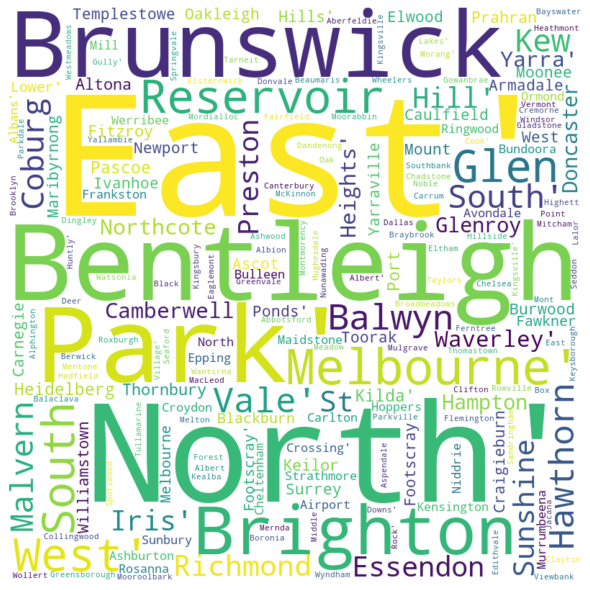

In [25]:
wordcloudOfColumns(df)

In [1]:
stop_words = set(stopwords.words('english')) 
print(stop_words)

NameError: name 'stopwords' is not defined